### PISAÑA LLAMOCCA PATRICK FLORIAN - 19200093


Información de atributos:

a1 Temperatura del paciente {35C-42C}

a2 Aparición de náuseas {sí, no}

a3 Dolor lumbar {sí, no}

a4 Empuje de orina (necesidad continua de orinar) {sí, no}

a5 Dolores de micción {sí, no}

a6 Ardor de uretra, picazón, hinchazón de la salida de la uretra {sí, no}

Decisión d1: inflamación de la vejiga urinaria {sí, no}

Decisión d2: Nefritis de origen en la pelvis renal {sí, no}

En un notebook desarrolle un modelo o modelos que permita predecir la inflamación de vejiga urinaria y la nefritis. En 
cada caso debe colocar la forma en la que se recuperan los datos, análisis exploratorio de los datos, transformación 
de datos si fuera el caso, selección del conjunto de entrenamiento y prueba, evaluación del modelo o modelos 
desarrollados y conclusión sobre el mejor modelo elegido.

In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [276]:
datos = pd.read_csv('diagnosis.txt',names=['Temperature','Nausea','Lumbar pain','Urine pushing','Micturition pains','Burning of urethra','Inflammation','Nephritis'],delimiter='	')

In [277]:
datos.head()

,Temperature,Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation,Nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [278]:
datos.tail()

,Temperature,Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation,Nephritis
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes
119,41.5,no,yes,yes,no,yes,no,yes


In [279]:
datos.describe()

,Temperature
count,120.000000
mean,38.724167
std,1.819132
min,35.500000
25%,37.100000
50%,37.950000
75%,40.600000
max,41.500000


In [280]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         120 non-null    float64
 1   Nausea              120 non-null    object 
 2   Lumbar pain         120 non-null    object 
 3   Urine pushing       120 non-null    object 
 4   Micturition pains   120 non-null    object 
 5   Burning of urethra  120 non-null    object 
 6   Inflammation        120 non-null    object 
 7   Nephritis           120 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.6+ KB


# ANALISIS EXPLORATORIO DE DATOS

<AxesSubplot:xlabel='Urine pushing', ylabel='count'>

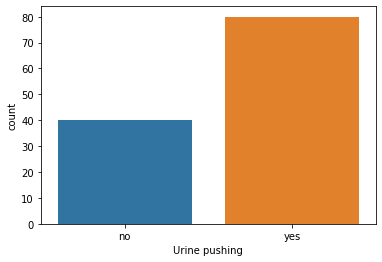

In [281]:
sns.countplot(x='Urine pushing',data=datos)

<AxesSubplot:xlabel='Inflammation', ylabel='count'>

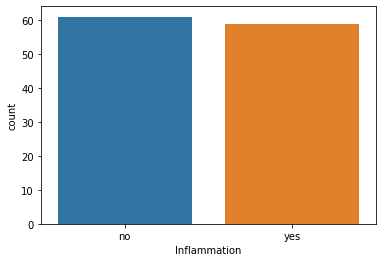

In [282]:
sns.countplot(x='Inflammation',data=datos)

<AxesSubplot:xlabel='Nephritis', ylabel='count'>

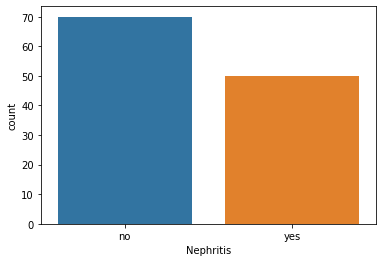

In [283]:
sns.countplot(x='Nephritis',data=datos)

<AxesSubplot:xlabel='Urine pushing', ylabel='count'>

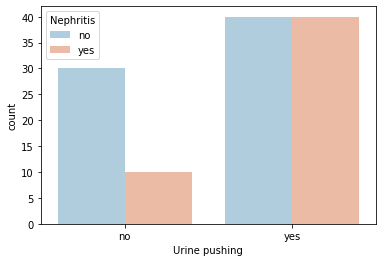

In [284]:
sns.countplot(x='Urine pushing',hue='Nephritis',data=datos,palette='RdBu_r')

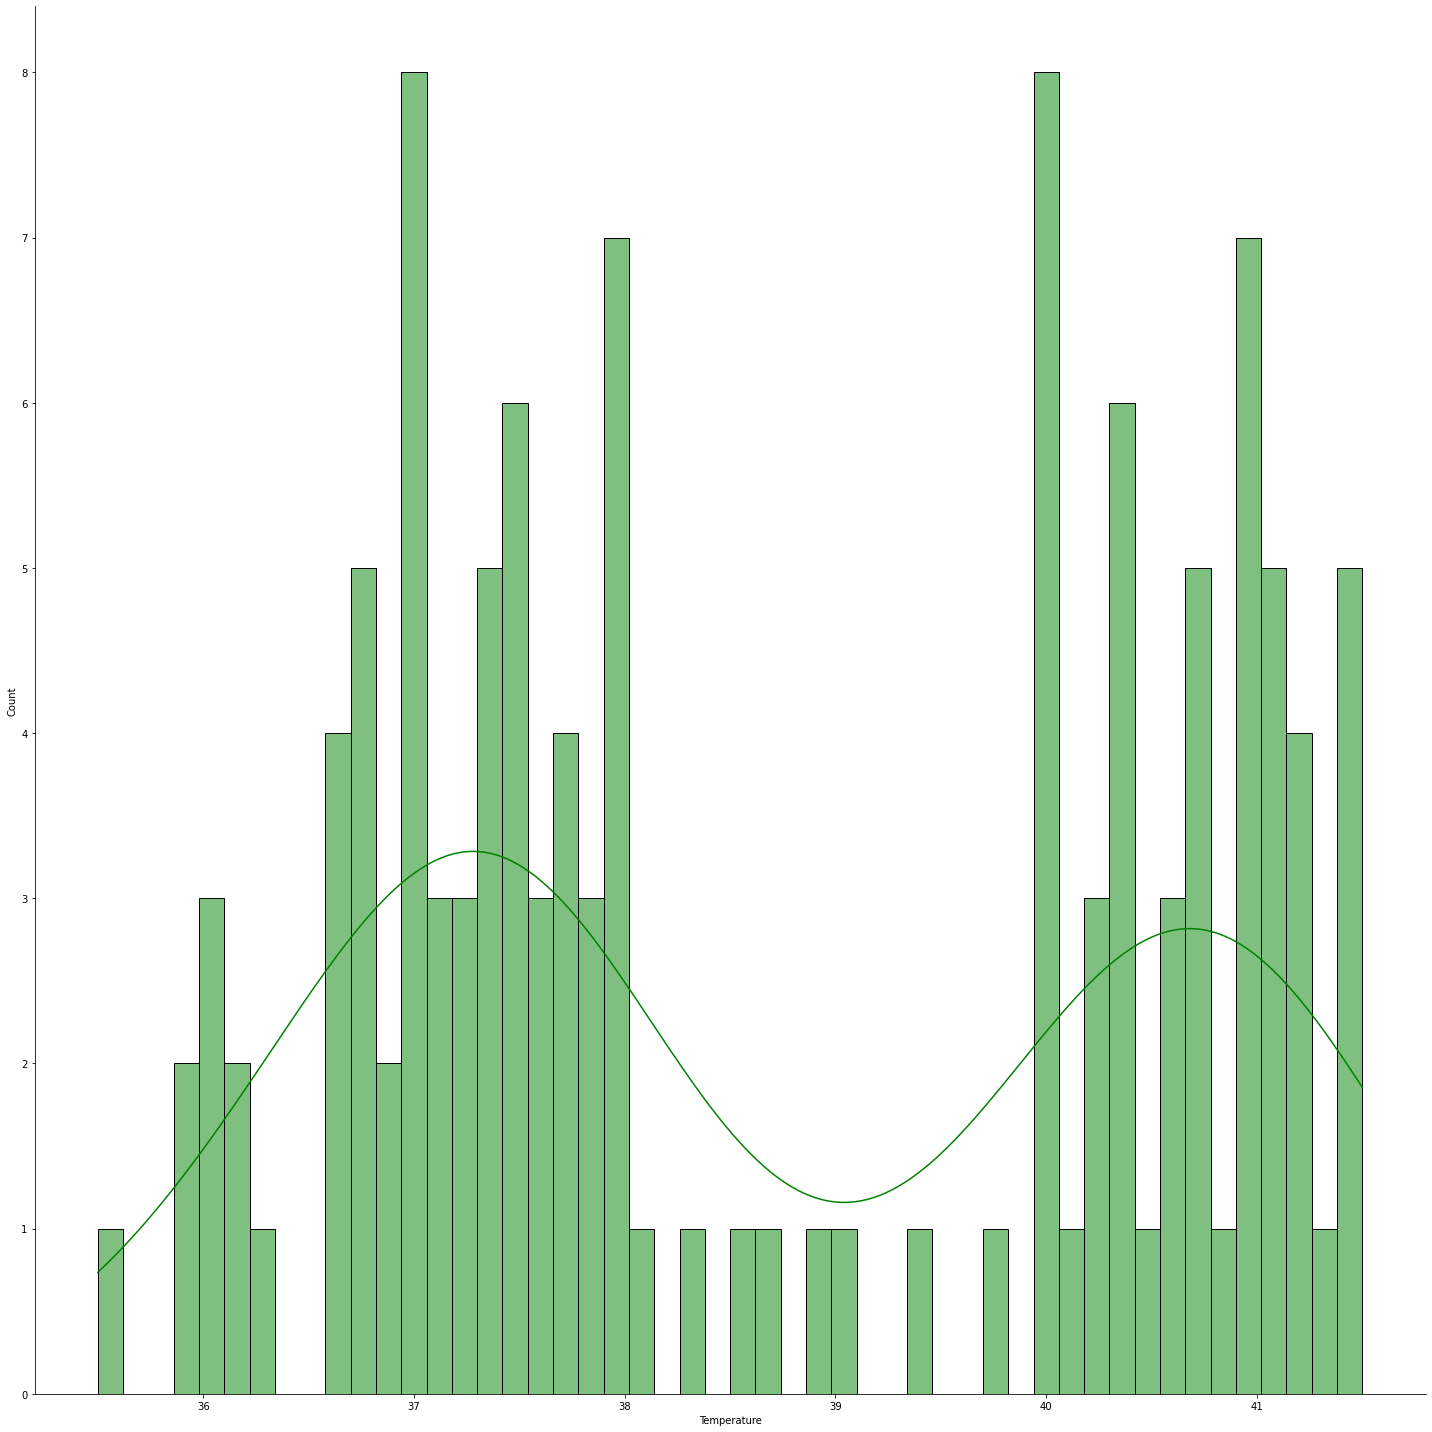

In [285]:
sns.displot(datos['Temperature'],bins=50,kde=True, height=20, color='green')

<AxesSubplot:>

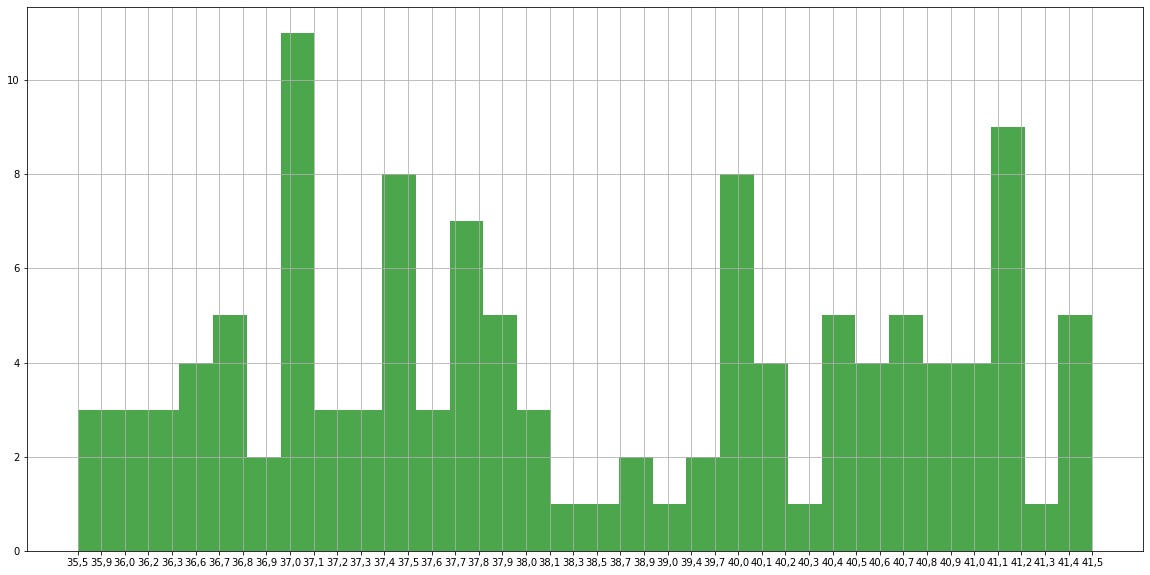

In [40]:
datos['Temperature'].hist(bins=30,color='green',alpha=0.7,figsize=(20,10))

## Conversión de características categóricas
¡Necesitamos convertir características categóricas a variables dummy usando pandas! De lo
contrario, nuestro algoritmo de aprendizaje automático no podrá tomar directamente esas
características como entradas

In [286]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         120 non-null    float64
 1   Nausea              120 non-null    object 
 2   Lumbar pain         120 non-null    object 
 3   Urine pushing       120 non-null    object 
 4   Micturition pains   120 non-null    object 
 5   Burning of urethra  120 non-null    object 
 6   Inflammation        120 non-null    object 
 7   Nephritis           120 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.6+ KB


In [287]:
datos.head()

,Temperature,Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation,Nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [288]:
datos['Nausea'].unique()

array(['no', 'yes'], dtype=object)

In [289]:
datos['Lumbar pain'].unique()

array(['yes', 'no'], dtype=object)

In [290]:
datos['Urine pushing'].unique()

array(['no', 'yes'], dtype=object)

In [291]:
datos['Micturition pains'].unique()

array(['no', 'yes'], dtype=object)

In [292]:
datos['Burning of urethra'].unique()

array(['no', 'yes'], dtype=object)

In [293]:
datos['Inflammation'].unique()

array(['no', 'yes'], dtype=object)

In [294]:
datos['Nephritis'].unique() 

array(['no', 'yes'], dtype=object)

## Dataframes con las variables dummy

In [295]:
Nausea = pd.get_dummies(datos['Nausea'],drop_first=True)
Nausea.set_axis(['Nausea'], axis='columns', inplace=True)
print(Nausea)

     Nausea
0         0
1         0
2         0
3         0
4         0
..      ...
115       0
116       0
117       1
118       0
119       0

[120 rows x 1 columns]


In [296]:
Lumbar_pain = pd.get_dummies(datos['Lumbar pain'],drop_first=True)
Lumbar_pain.set_axis(['Lumbar pain'], axis='columns', inplace=True)
print(Lumbar_pain)

     Lumbar pain
0              1
1              0
2              1
3              0
4              1
..           ...
115            1
116            0
117            1
118            1
119            1

[120 rows x 1 columns]


In [297]:
Urine_pushing = pd.get_dummies(datos['Urine pushing'],drop_first=True)
Urine_pushing.set_axis(['Urine pushing'], axis='columns', inplace=True)
print(Urine_pushing)

     Urine pushing
0                0
1                1
2                0
3                1
4                0
..             ...
115              1
116              0
117              0
118              1
119              1

[120 rows x 1 columns]


In [298]:
Micturition_pains = pd.get_dummies(datos['Micturition pains'],drop_first=True)
Micturition_pains.set_axis(['Micturition pains'], axis='columns', inplace=True)
print(Micturition_pains)

     Micturition pains
0                    0
1                    1
2                    0
3                    1
4                    0
..                 ...
115                  0
116                  0
117                  1
118                  0
119                  0

[120 rows x 1 columns]


In [299]:
Burning_of_urethra = pd.get_dummies(datos['Burning of urethra'],drop_first=True)
Burning_of_urethra.set_axis(['Burning of urethra'], axis='columns', inplace=True)
print(Burning_of_urethra)

     Burning of urethra
0                     0
1                     1
2                     0
3                     1
4                     0
..                  ...
115                   1
116                   0
117                   0
118                   1
119                   1

[120 rows x 1 columns]


In [300]:
Inflammation = pd.get_dummies(datos['Inflammation'],drop_first=True)
Inflammation.set_axis(['Inflammation'], axis='columns', inplace=True)
print(Inflammation)

     Inflammation
0               0
1               1
2               0
3               1
4               0
..            ...
115             0
116             0
117             0
118             0
119             0

[120 rows x 1 columns]


In [301]:
Nephritis = pd.get_dummies(datos['Nephritis'],drop_first=True)
Nephritis.set_axis(['Nephritis'], axis='columns', inplace=True)
print(Nephritis)

     Nephritis
0            0
1            0
2            0
3            0
4            0
..         ...
115          1
116          0
117          1
118          1
119          1

[120 rows x 1 columns]


In [302]:
datos.head()

,Temperature,Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation,Nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


### eliminamos las columnas que serán reemplazadas por las variables dummy y aquellas que consideramos importantes para la prediccion

In [303]:
datos.drop(['Nausea','Lumbar pain','Urine pushing','Micturition pains','Burning of urethra','Inflammation','Nephritis'],axis=1,inplace=True)

In [304]:
datos.head()

,Temperature
0,35.5
1,35.9
2,35.9
3,36.0
4,36.0


## Se unen los dataframe con "concat"


In [305]:
datos = pd.concat([datos,Nausea,Lumbar_pain,Urine_pushing,Micturition_pains,Burning_of_urethra,Inflammation,Nephritis],axis=1)

In [306]:
datos.head(15)

,Temperature,Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation,Nephritis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
5,36.0,0,1,0,0,0,0,0
6,36.2,0,0,1,1,1,1,0
7,36.2,0,1,0,0,0,0,0
8,36.3,0,0,1,1,1,1,0
9,36.6,0,0,1,1,1,1,0


In [307]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         120 non-null    float64
 1   Nausea              120 non-null    uint8  
 2   Lumbar pain         120 non-null    uint8  
 3   Urine pushing       120 non-null    uint8  
 4   Micturition pains   120 non-null    uint8  
 5   Burning of urethra  120 non-null    uint8  
 6   Inflammation        120 non-null    uint8  
 7   Nephritis           120 non-null    uint8  
dtypes: float64(1), uint8(7)
memory usage: 1.9 KB


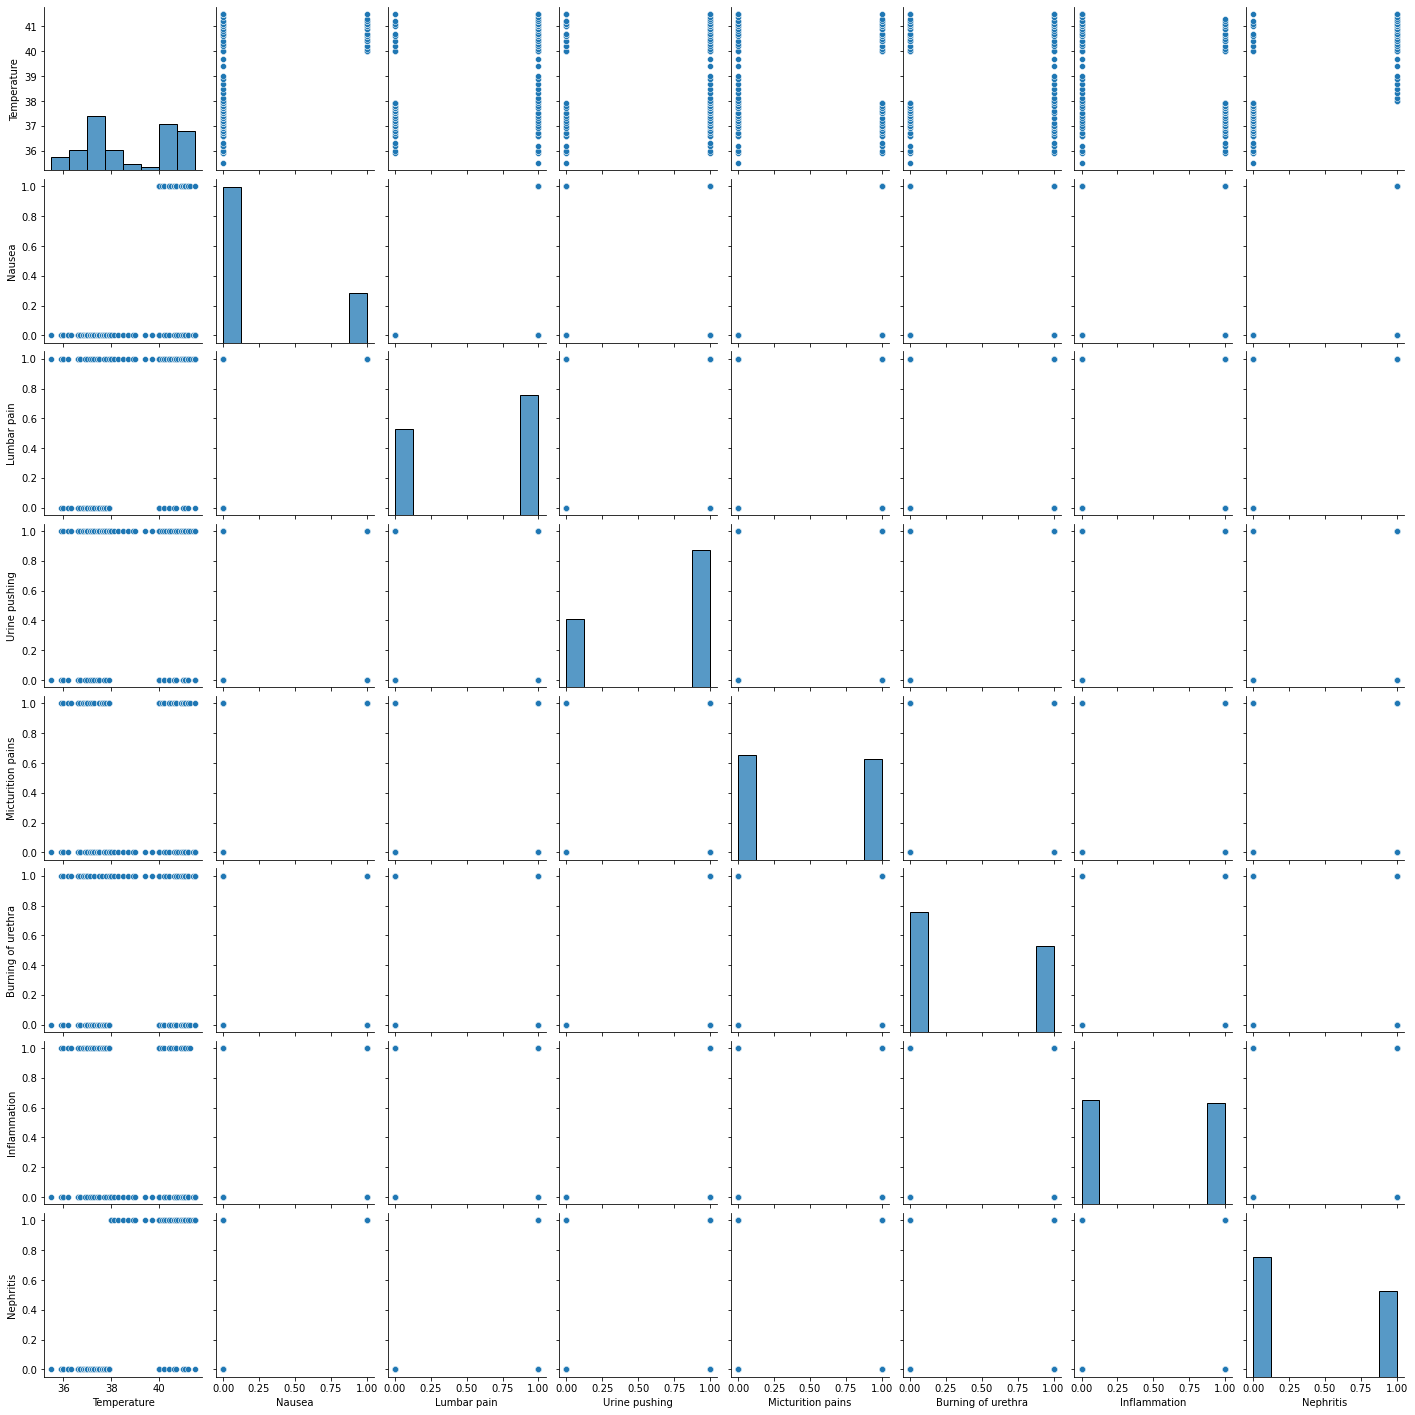

In [308]:
sns.pairplot(datos)

## Construcción del modelo de Regresión Logística

#### Construcción del modelo de Regresión Logística para la variable Inflammation


### División en conjunto de entrenamiento y prueba

In [309]:
from sklearn.model_selection import train_test_split

In [310]:
X1 = datos.drop(['Inflammation','Nephritis'],axis=1)

In [311]:
X1.head()

,Temperature,Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra
0,35.5,0,1,0,0,0
1,35.9,0,0,1,1,1
2,35.9,0,1,0,0,0
3,36.0,0,0,1,1,1
4,36.0,0,1,0,0,0


In [312]:
y1=datos['Inflammation']

In [313]:
y1

0      0
1      1
2      0
3      1
4      0
      ..
115    0
116    0
117    0
118    0
119    0
Name: Inflammation, Length: 120, dtype: uint8

In [314]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, 
                                                    y1, 
                                                    test_size=0.30, 
                                                    random_state=60)

### Predicciones y Evaluaciones

In [315]:
from sklearn.linear_model import LogisticRegression

In [319]:
modelo1 = LogisticRegression(max_iter=1000)

In [320]:
modelo1.fit(X_train1,y_train1)

LogisticRegression(max_iter=1000)

In [321]:
predictions1 = modelo1.predict(X_test1)

In [322]:
y_test1

21     1
105    1
97     0
93     1
3      1
23     1
58     1
91     0
1      1
95     0
56     1
19     0
28     0
73     0
4      0
89     1
88     1
110    1
30     1
55     1
61     0
8      1
92     1
14     0
96     0
82     0
69     0
37     0
13     1
35     1
22     0
29     1
78     1
52     0
25     1
62     0
Name: Inflammation, dtype: uint8

In [323]:
X_test1

,Temperature,Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra
21,37.0,0,0,1,1,0
105,41.1,1,1,1,1,1
97,40.8,0,1,1,0,1
93,40.7,1,1,1,1,0
3,36.0,0,0,1,1,1
23,37.0,0,0,1,1,1
58,37.9,0,0,1,1,1
91,40.6,1,1,0,1,0
1,35.9,0,0,1,1,1
95,40.7,1,1,0,1,0


In [324]:
predictions1

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=uint8)

### Evaluación MODELO 1 PARA Y= Inflammation

In [325]:
from sklearn.metrics import confusion_matrix

In [326]:
confusion_matrix(y_test1,predictions1)

array([[16,  0],
       [ 0, 20]], dtype=int64)

In [327]:
from sklearn.metrics import classification_report

In [328]:
print(classification_report(y_test1,predictions1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        20

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Construcción del modelo de Regresión Logística PARA Y=Nephritis


#### Construcción del modelo de Regresión Logística para la variable Nephritis


In [334]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         120 non-null    float64
 1   Nausea              120 non-null    uint8  
 2   Lumbar pain         120 non-null    uint8  
 3   Urine pushing       120 non-null    uint8  
 4   Micturition pains   120 non-null    uint8  
 5   Burning of urethra  120 non-null    uint8  
 6   Inflammation        120 non-null    uint8  
 7   Nephritis           120 non-null    uint8  
dtypes: float64(1), uint8(7)
memory usage: 1.9 KB


In [341]:
X2 = datos.drop(['Nephritis','Inflammation'],axis=1)

In [343]:
X2

,Temperature,Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra
0,35.5,0,1,0,0,0
1,35.9,0,0,1,1,1
2,35.9,0,1,0,0,0
3,36.0,0,0,1,1,1
4,36.0,0,1,0,0,0
...,...,...,...,...,...,...
115,41.4,0,1,1,0,1
116,41.5,0,0,0,0,0
117,41.5,1,1,0,1,0
118,41.5,0,1,1,0,1


In [346]:
y2=datos['Nephritis']

In [347]:
y2

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    0
117    1
118    1
119    1
Name: Nephritis, Length: 120, dtype: uint8

In [348]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, 
                                                    y2, 
                                                    test_size=0.35, 
                                                    random_state=101)

### Predicciones y Evaluaciones

In [349]:
from sklearn.linear_model import LogisticRegression

In [350]:
modelo2 = LogisticRegression(max_iter=1000)

In [351]:
modelo2.fit(X_train2,y_train2)

LogisticRegression(max_iter=1000)

In [353]:
predictions2 = modelo2.predict(X_test2)

In [354]:
y_test2

13     0
68     1
54     0
21     0
67     1
1      0
53     0
98     1
41     0
99     1
57     0
100    1
66     1
45     0
16     0
43     0
69     1
116    0
103    1
108    1
61     1
31     0
33     0
119    1
79     1
88     1
6      0
113    1
65     1
32     0
48     0
25     0
102    0
14     0
55     0
97     1
3      0
42     0
80     0
94     0
58     0
118    1
Name: Nephritis, dtype: uint8

In [355]:
X_test2

,Temperature,Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra
13,36.7,0,0,1,1,1
68,39.4,0,1,1,0,1
54,37.8,0,0,1,0,0
21,37.0,0,0,1,1,0
67,39.0,0,1,1,0,1
1,35.9,0,0,1,1,1
53,37.8,0,0,1,1,1
98,40.9,1,1,1,1,0
41,37.5,0,1,0,0,0
99,40.9,1,1,1,1,0


In [356]:
predictions2

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
      dtype=uint8)

### Evaluación MODELO 1 PARA Y= Nephritis

In [357]:
confusion_matrix(y_test2,predictions2)

array([[25,  0],
       [ 0, 17]], dtype=int64)

In [358]:
print(classification_report(y_test2,predictions2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        17

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



## KNN (K vecinos más cercanos) Y=  Inflammation


In [361]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X1,y1,
                                                    test_size=0.30,
                                                    random_state=101)

In [362]:
from sklearn.neighbors import KNeighborsClassifier

In [363]:
knn = KNeighborsClassifier(n_neighbors=1)

In [364]:
knn.fit(X_train3,y_train3)

KNeighborsClassifier(n_neighbors=1)

In [365]:
pred = knn.predict(X_test3)

### Predicciones y Evaluaciones

In [366]:
from sklearn.metrics import classification_report,confusion_matrix

In [367]:
print(confusion_matrix(y_test3,pred))

[[18  0]
 [ 0 18]]


In [368]:
print(classification_report(y_test3,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Elección del valor de K

In [369]:
tasa_error = []

# Tomará algún tiempo
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train3,y_train3)
    pred_i = knn.predict(X_test3)
    tasa_error.append(np.mean(pred_i != y_test3))

Text(0, 0.5, 'Tasa de Error')

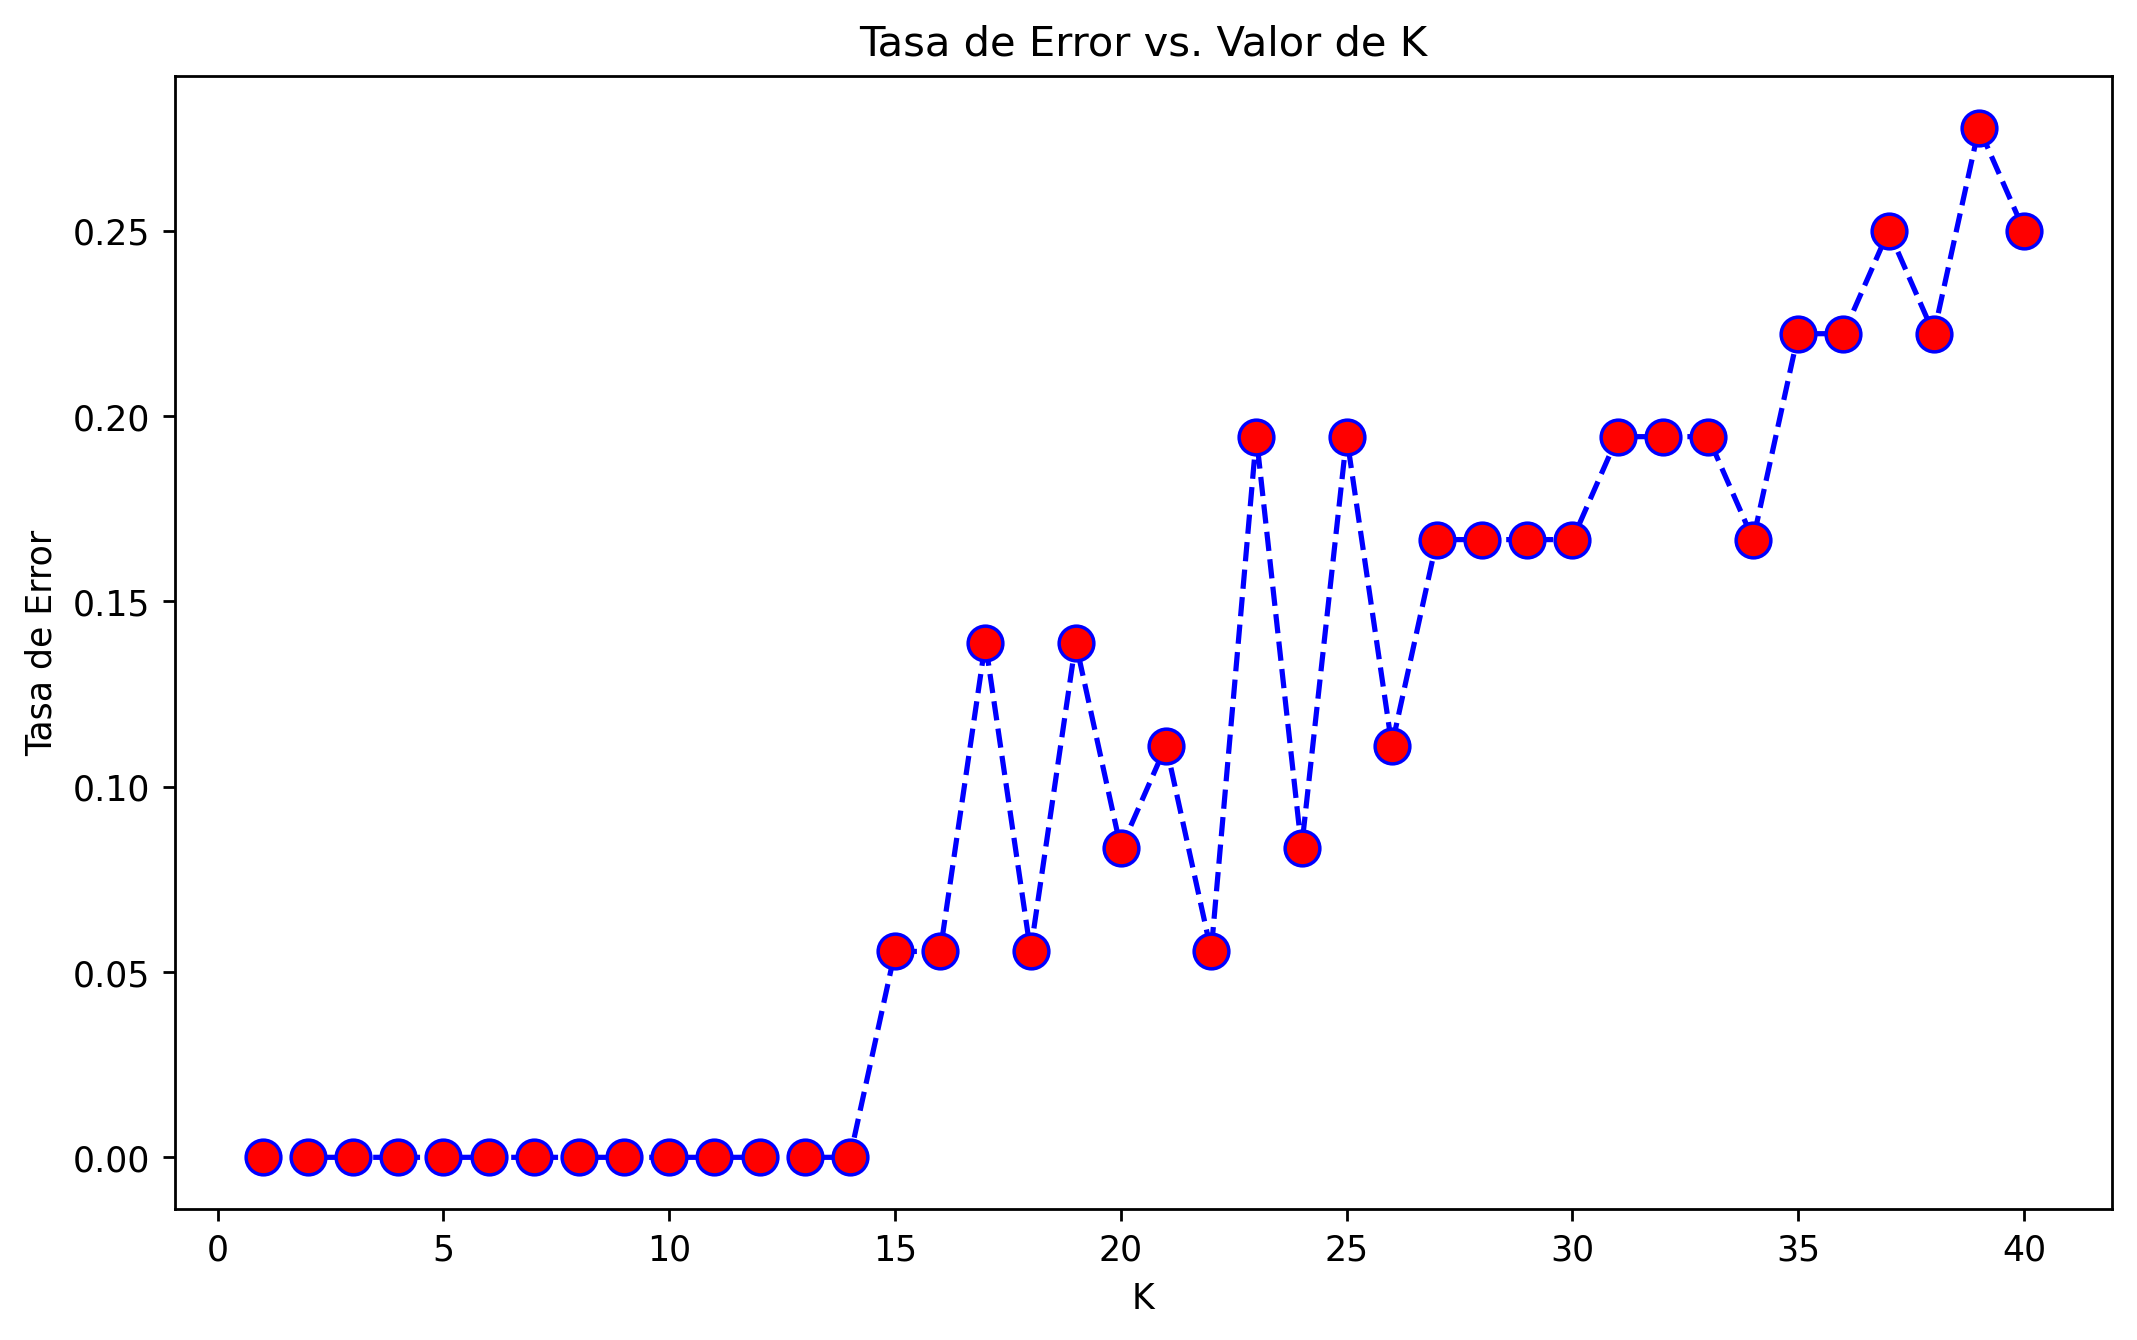

In [370]:
plt.figure(figsize=(10,6),dpi=250)
plt.plot(range(1,41),tasa_error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

In [386]:
# AHORA CON K=25
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train3,y_train3)
pred = knn.predict(X_test3)

print('CON K=25')
print('\n')
print(confusion_matrix(y_test3,pred))
print('\n')
print(classification_report(y_test3,pred))

CON K=25


[[11  7]
 [ 0 18]]


              precision    recall  f1-score   support

           0       1.00      0.61      0.76        18
           1       0.72      1.00      0.84        18

    accuracy                           0.81        36
   macro avg       0.86      0.81      0.80        36
weighted avg       0.86      0.81      0.80        36



In [387]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


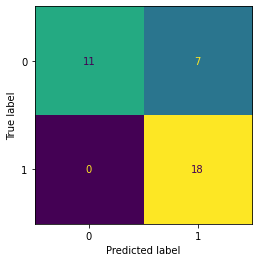

In [388]:
plot_confusion_matrix(knn,X_test3,y_test3,colorbar=False)

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


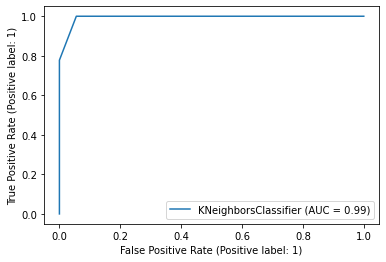

In [389]:
plot_roc_curve(knn,X_test3,y_test3)

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


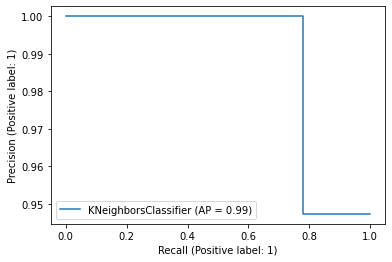

In [390]:
plot_precision_recall_curve(knn,X_test3,y_test3)

### Uso de KNN (K vecinos más cercanos) Y=Nephritis

In [378]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X2,y2,
                                                    test_size=0.30,
                                                    random_state=101)

In [379]:
knn = KNeighborsClassifier(n_neighbors=1)

In [380]:
knn.fit(X_train4,y_train4)

KNeighborsClassifier(n_neighbors=1)

In [381]:
pred = knn.predict(X_test4)

### Predicciones y Evaluaciones

In [382]:
print(confusion_matrix(y_test4,pred))

[[20  0]
 [ 0 16]]


In [383]:
print(classification_report(y_test3,pred))

              precision    recall  f1-score   support

           0       0.30      0.33      0.32        18
           1       0.25      0.22      0.24        18

    accuracy                           0.28        36
   macro avg       0.28      0.28      0.28        36
weighted avg       0.27      0.28      0.28        36



### Elección del valor de K

In [384]:
tasa_error = []

# Tomará algún tiempo
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train4,y_train4)
    pred_i = knn.predict(X_test4)
    tasa_error.append(np.mean(pred_i != y_test4))

Text(0, 0.5, 'Tasa de Error')

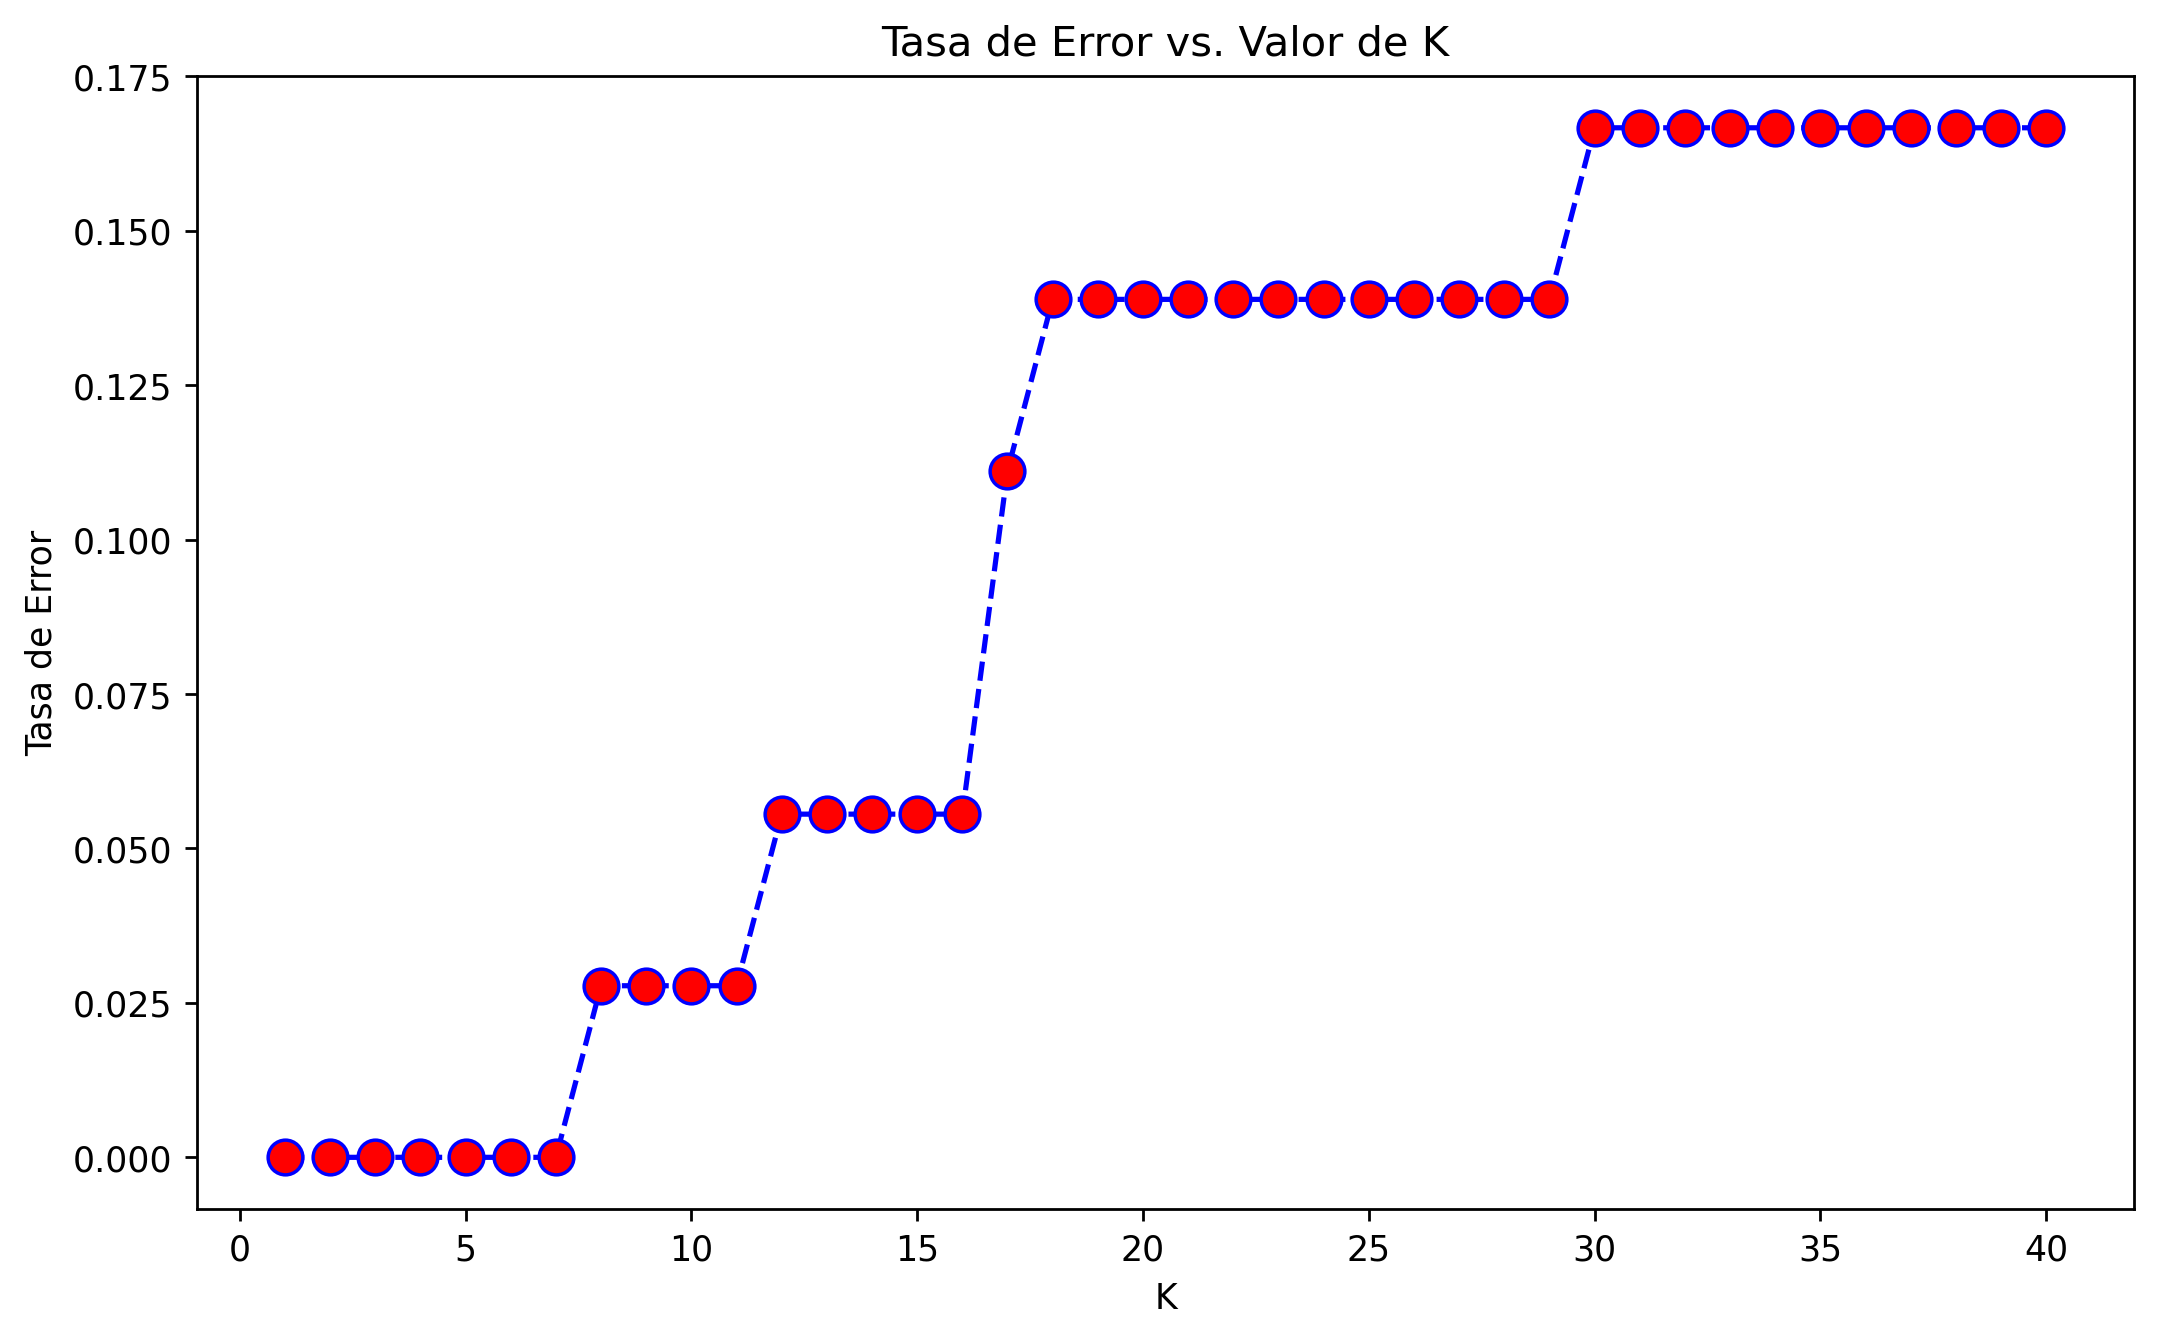

In [385]:
plt.figure(figsize=(10,6),dpi=250)
plt.plot(range(1,41),tasa_error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

In [391]:
# AHORA CON K=16
knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train4,y_train4)
pred = knn.predict(X_test4)

print('CON K=16')
print('\n')
print(confusion_matrix(y_test4,pred))
print('\n')
print(classification_report(y_test4,pred))

CON K=16


[[20  0]
 [ 2 14]]


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.88      0.93        16

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


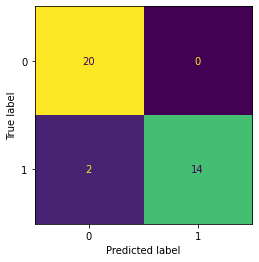

In [392]:
plot_confusion_matrix(knn,X_test4,y_test4,colorbar=False)

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


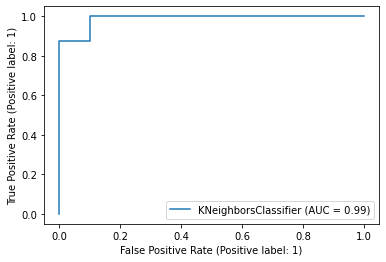

In [393]:
plot_roc_curve(knn,X_test4,y_test4)

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


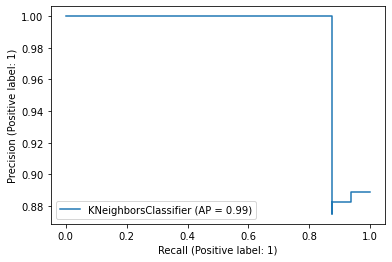

In [394]:
plot_precision_recall_curve(knn,X_test4,y_test4)

In [395]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         120 non-null    float64
 1   Nausea              120 non-null    uint8  
 2   Lumbar pain         120 non-null    uint8  
 3   Urine pushing       120 non-null    uint8  
 4   Micturition pains   120 non-null    uint8  
 5   Burning of urethra  120 non-null    uint8  
 6   Inflammation        120 non-null    uint8  
 7   Nephritis           120 non-null    uint8  
dtypes: float64(1), uint8(7)
memory usage: 1.9 KB


# CONCLUSIONES

-REGRESION LOGISTICA

El uso de la regresion logistica fue efectiva, para la variable y = Inflammation tuvo una precision de 1 y para la variable y = Nephritis tambien tuvo una exactitud de 1.

-KNN

Para KNN tuvimos mayor precision con la variable de Inflammation con respecto a la variable Nephritis